# Actividad
Aplicación de redes neuronales completamente
conectadas en problemas de regresión utilizando Keras.



---

Por: Ángela Daniela Córdoba Álvarez


---



El dataset usando es: https://www.kaggle.com/datasets/mirichoi0218/insurance



In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Cargar el dataset
df = pd.read_csv('insurance.csv')

# Estructura del dataset
print("Dimensiones del dataset:", df.shape)
print("\nEstructura del dataset:")
display(df.head())

Dimensiones del dataset: (1338, 7)

Estructura del dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# Visualizamos una muestra del dataset

# Información estadística
print("Información estadística del dataset:")
display(df.describe())

# Tipos de datos y valores faltantes
print("\nTipos de datos y valores faltantes:")
display(df.info())

Información estadística del dataset:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Tipos de datos y valores faltantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

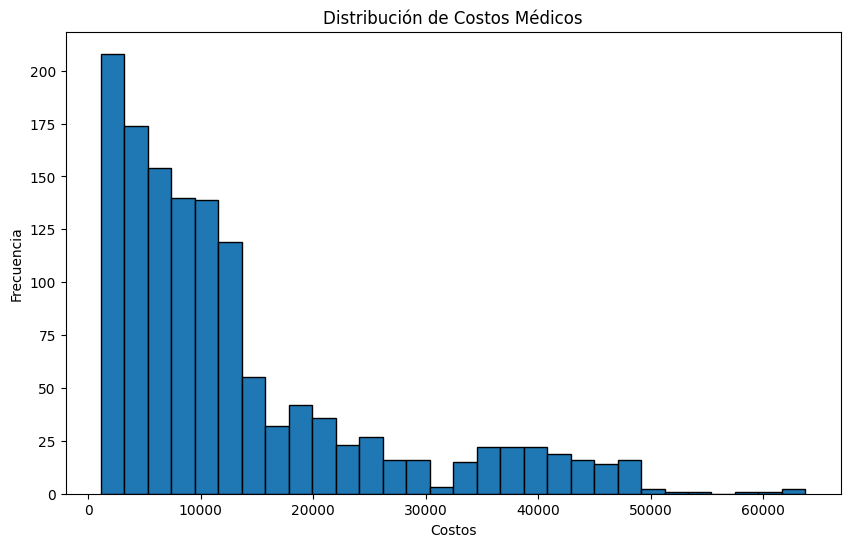

In [3]:
import matplotlib.pyplot as plt

# Visualización de la distribución de 'charges'
plt.figure(figsize=(10, 6))
plt.hist(df['charges'], bins=30, edgecolor='black')
plt.title('Distribución de Costos Médicos')
plt.xlabel('Costos')
plt.ylabel('Frecuencia')
plt.show()

In [4]:
# Prepocesamiento y normalización de los datos
print("Preprocesamiento y normalización de los datos:")
print(df.isnull().sum())

Preprocesamiento y normalización de los datos:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
from sklearn.preprocessing import OneHotEncoder

# Convertir variables categóricas a numéricas usando One-Hot Encoding
categorical_cols = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_cols])

# Crear un DataFrame a partir de los datos codificados
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Eliminar las columnas categóricas originales y concatenar las codificadas
df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, encoded_df], axis=1)

# Construcción del modelo de regresión
X = df.drop('charges', axis=1)
y = df['charges']


In [6]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear')) # Cambiar función de activación

# Compilar modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Arquitectura del modelo
print("\nArquitectura del modelo:")
model.summary()

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Arquitectura del modelo:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
                                                    random_state=42)

# Asegurar que los datos sean de tipo float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [8]:
# Entrenar el modelo
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
34/34 [==============================] - 4s 70ms/step - loss: 319153408.0000 - mean_absolute_error: 13209.1240 - val_loss: 335550368.0000 - val_mean_absolute_error: 13477.5557
Epoch 2/100
34/34 [==============================] - 1s 17ms/step - loss: 318394784.0000 - mean_absolute_error: 13181.9961 - val_loss: 334639296.0000 - val_mean_absolute_error: 13445.4053
Epoch 3/100
34/34 [==============================] - 0s 12ms/step - loss: 317088832.0000 - mean_absolute_error: 13134.9824 - val_loss: 332790400.0000 - val_mean_absolute_error: 13379.9561
Epoch 4/100
34/34 [==============================] - 0s 15ms/step - loss: 314486336.0000 - mean_absolute_error: 13041.1934 - val_loss: 329313504.0000 - val_mean_absolute_error: 13256.3086
Epoch 5/100
34/34 [==============================] - 0s 14ms/step - loss: 309872576.0000 - mean_absolute_error: 12873.1855 - val_loss: 323451168.0000 - val_mean_absolute_error: 13045.3604
Epoch 6/100
34/34 [==============================] - 0s 10ms

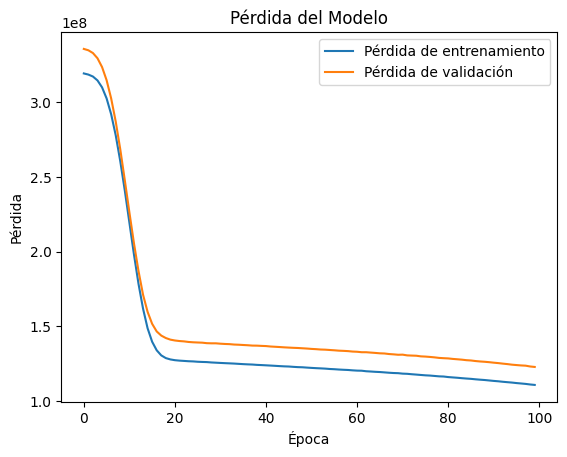

In [9]:
# Mostrar gráficamente la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


In [10]:
# Evaluar el rendimiento del modelo usando diferentes métricas
loss, mae = model.evaluate(X, y)
print("Pérdida del modelo:", loss)
print("Error absoluto medio (MAE):", mae)

42/42 [==============================] - 0s 2ms/step - loss: 113154392.0000 - mean_absolute_error: 8440.7070
Pérdida del modelo: 113154392.0
Error absoluto medio (MAE): 8440.70703125


In [11]:
# Predicción de una muestra utilizando el modelo entrenado
# Ejemplo
sample_data = X.head(5)
sample_predictions = model.predict(sample_data)
print("\nEjemplo:")

for i in range(len(sample_data)):
    print(f'Datos de muestra: {sample_data.iloc[i].values}, Predicción: {sample_predictions[i][0]:.2f}')

1/1 [==============================] - 0s 132ms/step

Ejemplo:
Datos de muestra: [19.  27.9  0.   1.   0.   0.   1.   0.   0.   0.   1. ], Predicción: 9698.28
Datos de muestra: [18.   33.77  1.    0.    1.    1.    0.    0.    0.    1.    0.  ], Predicción: 9355.77
Datos de muestra: [28. 33.  3.  0.  1.  1.  0.  0.  0.  1.  0.], Predicción: 11875.12
Datos de muestra: [33.    22.705  0.     0.     1.     1.     0.     0.     1.     0.
  0.   ], Predicción: 10219.65
Datos de muestra: [32.   28.88  0.    0.    1.    1.    0.    0.    1.    0.    0.  ], Predicción: 11012.44


Para verificar si este modelo es válido, podemos validarlo con lo siguiente:
* Error cuadrático medio (RMSE)
* Coeficiente de determinación (R²)
* Error absoluto medio (MAE)
* Error absoluto medio porcentual (MAPE)
* Error de predicción

In [12]:
# Evaluar el rendimiento del modelo usando el conjunto de prueba
y_pred = model.predict(X_test) # Predicciones del modelo

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cálculo métricas
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

rmse = np.sqrt(mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R²):", r2)

9/9 [==============================] - 0s 2ms/step
Error cuadrático medio (MSE): 273811040.0
Raíz del error cuadrático medio (RMSE): 16547.236
Error absoluto medio (MAE): 12186.539
Coeficiente de determinación (R²): -0.7636925783109896


In [13]:
# Error de predicción
y_pred = y_pred.flatten() # Convertir el array 2D y_pred a un array 1D
error = y_pred - y_test
print("Error de predicción:", error)

Error de predicción: 764     -9095.485352
887     -5273.318848
890    -26171.390625
1293    -9302.374023
259    -30513.759766
            ...     
109    -42354.000000
575    -12223.865234
535     -6067.137695
543    -59482.058594
846     -9873.891602
Name: charges, Length: 268, dtype: float32


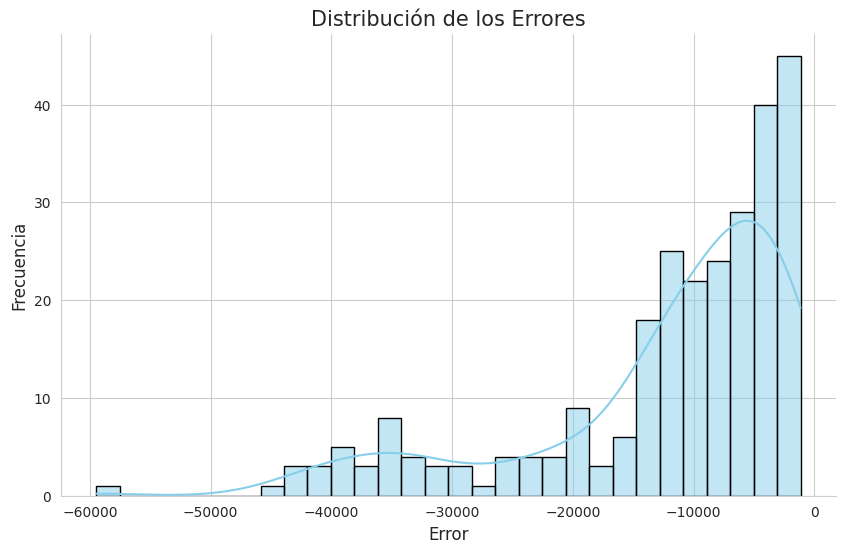

In [14]:
import seaborn as sns

# Distribución del error de predicción
# Establecer el estilo y el color del fondo
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(error, bins=30, kde=True, color='skyblue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Distribución de los Errores', fontsize=15)
plt.xlabel('Error', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Eliminar los bordes del gráfico
sns.despine()

# Mostrar el gráfico
plt.show()


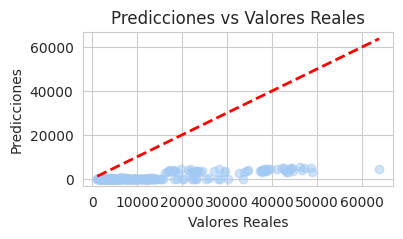

In [15]:
# Visualización de las predicciones vs los valores reales
plt.figure(figsize=(4, 2))  # Tamaño del gráfico
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()